# Worksheet 12

Name:  Daniyal Ahmed
UID: U11469883

### Topics

- Introduction to Classification
- K Nearest Neighbors

### Introduction to Classification

a) For the following examples, say whether they are or aren't an example of classification.

1. Predicting whether a student will be offered a job after graduating given their GPA.
2. Predicting how long it will take (in number of months) for a student to be offered a job after graduating, given their GPA.
3. Predicting the number of stars (1-5) a person will assign in their yelp review given the description they wrote in the review.
4. Predicting the number of births occuring in a specified minute.

1 and 3 are classifcations since in number 3 the label can be the number of stars while in number 1 the labels can be whether they got the job or not.

b) Given a dataset, how would you set things up such that you can both learn a model and get an idea of how this model might perform on data it has never seen?

You would use Instance-Based Classifiers on this model, since you can used stored data to see how the model reacts on unseen data

c) In your own words, briefly explain:

- underfitting
- overfitting

and what signs to look out for for each.

Underfitting the Dataset usually happens whens model has not analyzed the data enough or learned enough from a data. Basically when a model is underfitted it is not following the data set closely enough. While when a model is overfitted, it is following the data set too closely and not predicting what some labels can be rather just looking at the data set for any thing that looks similar enouugh. In conclusion Overfitting is when the model references the dataset too much but Underfitting is when it doesn't reference it enough

### K Nearest Neighbors

In [53]:
import numpy as np
import matplotlib.pyplot as plt

data = {
    "Attribute A" : [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0., 10],
    "Attribute B" : [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5, 10],
    "Class" : [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0],
}



a) Plot the data in a 2D plot coloring each scatter point one of two colors depending on its corresponding class.

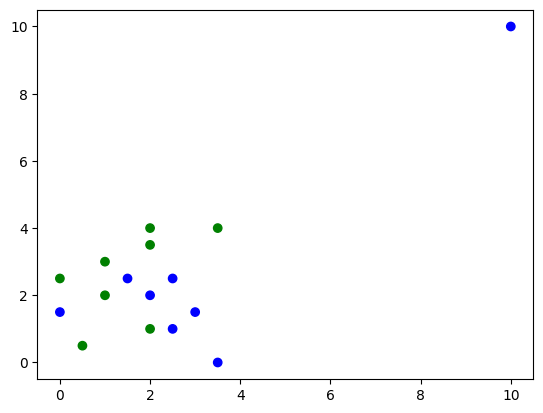

In [54]:
colors = np.array([x for x in 'bgrcmyk'])
plt.scatter(data["Attribute A"], data["Attribute B"], color=colors[data["Class"]].tolist())
plt.show()

Outliers are points that lie far from the rest of the data. They are not necessarily invalid points however. Imagine sampling from a Normal Distribution with mean 10 and variance 1. You would expect most points you sample to be in the range [7, 13] but it's entirely possible to see 20 which, on average, should be very far from the rest of the points in the sample (unless we're VERY (un)lucky). These outliers can inhibit our ability to learn general patterns in the data since they are not representative of likely outcomes. They can still be useful in of themselves and can be analyzed in great depth depending on the problem at hand.

b) Are there any points in the dataset that could be outliers? If so, please remove them from the dataset.

Yes there is one outlier in the data set is at point 10 10

In [55]:
data["Attribute A"].remove(10)
data["Attribute B"].remove(10)
data["Class"].remove(0)
print(data)

{'Attribute A': [3.5, 0, 1, 2.5, 2, 1.5, 2, 3.5, 1, 3, 2, 2, 2.5, 0.5, 0.0], 'Attribute B': [4, 1.5, 2, 1, 3.5, 2.5, 1, 0, 3, 1.5, 4, 2, 2.5, 0.5, 2.5], 'Class': [1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0]}


Noise points are points that could be considered invalid under the general trend in the data. These could be the result of actual errors in the data or randomness that we could attribute to oversimplification (for example if missing some information / feature about each point). Considering noise points in our model can often lead to overfitting.

c) Are there any points in the dataset that could be noise points?

Yes, the Point at (3.5,4) and the point at (3.5,0)

For the following point

|  A  |  B  |
|-----|-----|
| 0.5 |  1  |

d) Plot it in a different color along with the rest of the points in the dataset.

16
16
16


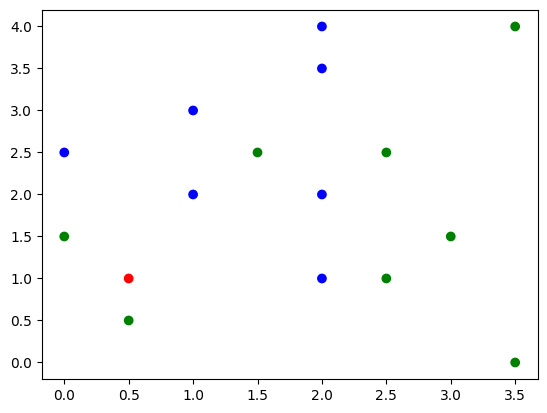

In [56]:
data["Attribute A"].append(.5)
data["Attribute B"].append(1.0)
data["Class"].append(2)
print(len(data["Attribute A"]))
print(len(data["Attribute B"]))
print(len(data["Class"]))
colors2 = np.array([x for x in 'bgrcmyk'])

plt.scatter(data["Attribute A"], data["Attribute B"], color=colors2[data["Class"]].tolist())
plt.show()

e) Write a function to compute the Euclidean distance from it to all points in the dataset and pick the 3 closest points to it. In a scatter plot, draw a circle centered around the point with radius the distance of the farthest of the three points.

[1.5811388300841898, (0.0, 2.5)]


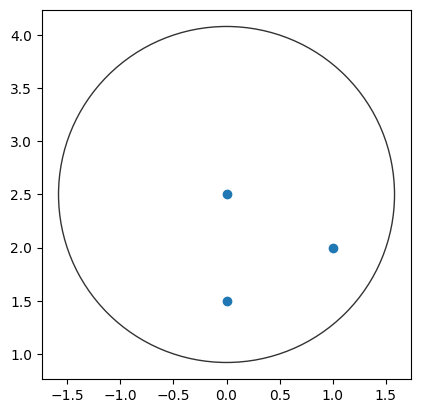

In [57]:
def n_closest_to(example, n):
    
    
    distances = []
    x=n["Attribute A"]
    y=n["Attribute B"]
    for i in range(len(x) ):
         if(x[i] != example[0] and y[i] != example[1]):   
            distances.append([np.sqrt((example[0]-x[i])**2 + (example[1]-y[i])**2),(x[i],y[i])]) 

    minimum = []
    minimum.append(min(distances , key = lambda x: x[0]))
    distances.remove(minimum[0])
    minimum.append(min(distances , key = lambda x: x[0]))
    distances.remove(minimum[1])
    minimum.append(min(distances , key = lambda x: x[0]))
    distances.remove(minimum[2])


    return minimum 



minimum = n_closest_to((.5,1), (data) )
max_point = max(minimum, key = lambda x: x[0])
print(max_point)
location = max_point[1]

radius = max_point[0]
_, axes = plt.subplots() 
x, y = zip(minimum[0][1], minimum[1][1], minimum[2][1])

axes.scatter(x,y)
cir = plt.Circle(location, radius, fill = False, alpha=0.8)
axes.add_patch(cir)
axes.set_aspect('equal') # necessary so that the circle is not oval
plt.show()

f) Write a function that takes the three points returned by your function in e) and returns the class that the majority of points have (break ties with a deterministic default class of your choosing). Print the class assigned to this new point by your function.

In [58]:
def majority(points,data):
    count = 0
    count2 = 0
    for i in range(0,len(points)):
        if(data["Class"][findIndex(data,points[i])]==1):
            count+=1
        if(data["Class"][findIndex(data,points[i])]==0):
            count2+=1  
        
    if(count>count2): 
        data["Class"][-1]=1  
        print("Assigning 1")
        return 1
    if(count2>count):
        data["Class"][-1]=0
        print("Assinging 0")    
        return 0

    if(count == count2):
        data["Class"][-1]=1
        print("Assigning 1")
        return 1

def findIndex(data,points):
    for i in range(len(data["Attribute A"])):
        if(data["Attribute A"][i] == points[0] and data["Attribute B"][i] == points[1]):
            return i

g) Re-using the functions from e) and f), you should be able to assign a class to any new point. In this exercise we will implement Leave-one-out cross validiation in order to evaluate the performance of our model.

For each point in the dataset:

- consider that point as your test set and the rest of the data as your training set
- classify that point using the training set
- keep track of whether you were correct with the use of a counter

Once you've iterated through the entire dataset, divide the counter by the number of points in the dataset to report an overall testing accuracy.

In [59]:
import copy

count = 0
for i in range(len(data["Attribute A"])):

    training_set ={}
    actual_class = data["Class"][i]
    training_set = {
        "Attribute A" : copy.deepcopy(data["Attribute A"]) ,
        "Attribute B" : copy.deepcopy(data["Attribute B"]) ,
        "Class" : copy.deepcopy(data["Class"]),
    }

    training_set["Attribute A"].pop(i)
    training_set["Attribute B"].pop(i)
    training_set["Class"].pop(i)   

    point = (data["Attribute A"][i], data["Attribute B"][i])
    prediction = majority(n_closest_to(point, training_set), training_set) 
    if prediction == actual_class:
        count += 1

print("overall accuracy = ", count/len(data["Attribute A"]))

TypeError: list indices must be integers or slices, not NoneType

## Challenge Problem

For this question we will re-use the "mnist_784" dataset.

a) Begin by creating a training and testing datasest from our dataset, with a 80-20 ratio, and random_state=1. You can use the `train_test_split` function from sklearn. By holding out a portion of the dataset we can evaluate how our model generalizes to unseen data (i.e. data it did not learn from).

In [ ]:
from sklearn.model_selection import train_test_split 
from sklearn.datasets import fetch_openml
X, y = fetch_openml(name="mnist_784", version=1, return_X_y=True,
as_frame=False)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=.8, test_size=0.2, random_state=1)

print(X_train)

/home/daniyal-ahmed/.local/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


b) For K ranging from 1 to 20:

1. train a KNN on the training data
2. record the training and testing accuracy

Plot a graph of the training and testing set accuracy as a function of the number of neighbors K (on the same plot). Which value of K is optimal? Briefly explain.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

score = []


for i in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=i)

    knn.fit(X_train, Y_train)

    score.append(knn.score(X_test, Y_test))


plt.scatter(range(1, 21), score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

KeyboardInterrupt: 

c) Using the best model from b), pick an image at random and plot it next to its K nearest neighbors

[[   0.         1072.8345632  1144.01180064 1255.05975953]]
[[41666 33666 19716 41932]]


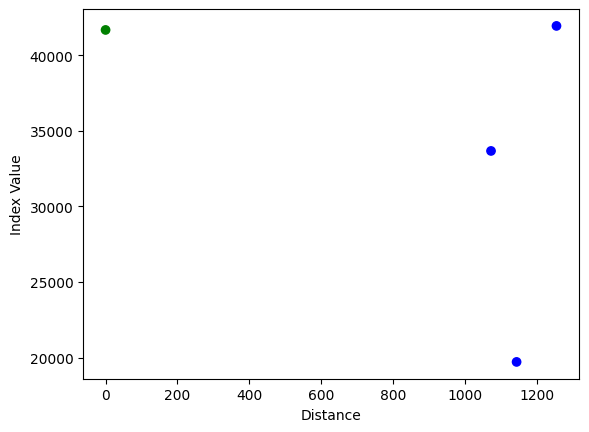

In [ ]:
import random


knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train, Y_train)

random_point = random.randint(0, len(X_train))

dis , points = knn.kneighbors(X_train[random_point].reshape(1, -1), 4, return_distance=True)



print(dis)
print(points)

col=[1,0,0,0]
#GREEN ONE IS THE ORIGINAL POINT
plt.scatter(dis, points, color = colors[col].tolist())
plt.xlabel("Distance")
plt.ylabel("Index Value")
plt.show()

d) Using a dimensionality reduction technique discussed in class, reduce the dimensionality of the dataset before applying a KNN model. Repeat b) and discuss similarities and differences to the previous model. Briefly discuss your choice of dimension and why you think the performance / accuracy of the model has changed.

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier


model = make_pipeline(PCA(n_components=2), KNeighborsClassifier(n_neighbors=3))
model.fit(X_train, Y_train)



for i in range(1, 21):
    
    model = make_pipeline( StandardScaler(),PCA(n_components=2), KNeighborsClassifier(n_neighbors=3))
    model.fit(X_train, Y_train)

    score.append(model.score(X_test, Y_test))


plt.scatter(range(1, 21), score)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()


NameError: name 'X_train' is not defined

## Midterm Prep (Part 1)

Compete in the Titanic Data Science Competition on Kaggle: https://www.kaggle.com/c/titanic 

Requirements:

1. Add at least 2 new features to the dataset (explain your reasoning below)
2. Use KNN (and only KNN) to predict survival
3. Explain your process below and choice of K
4. Make a submission to the competition and provide a link to your submission below.
5. Show your code below